Analyze size of multiple gels via hydrodynamic radius

In [1]:
import sys

sys.path.append("../")

In [ ]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from config import Config

In [3]:
def extract_timestep(p: Path) -> int:
    return int(p.stem.split("_")[-1])


def get_bead_file_subset(gel_dir_path: Path, stripe_size: int = 1) -> pd.DataFrame:
    all_pos_files = sorted(
        (gel_dir_path / "raw/gel_eq").glob("*.npy"), key=extract_timestep
    )
    pos_files = all_pos_files[:: max(1, stripe_size)]
    timesteps = [extract_timestep(p) for p in pos_files]
    config = Config.from_file(gel_dir_path / "config.json")
    df = pd.DataFrame({"paths": pos_files, "timestep": timesteps})
    df["seed"] = config.seed
    return df


gel_dir_base = Path().home() / "data/mmgel/production3"
gel_dirs = list(gel_dir_base.iterdir())

In [4]:
config = Config.from_file(gel_dirs[0] / "config.json")
BOX_L = config.initial_box_l
R = config.constraint_radius

In [ ]:
bead_dfs = [get_bead_file_subset(gel_dir) for gel_dir in gel_dirs]
bead_df = pd.concat(bead_dfs, ignore_index=True).drop_duplicates(ignore_index=True)
bead_df

# Plot gel sizes over time of every gel to see if they are done

In [ ]:
from analysis.analyze import HydroRadiusComputer

In [ ]:
paths_to_process = bead_df["paths"].copy()
hydro_df = HydroRadiusComputer.process_files(paths_to_process)

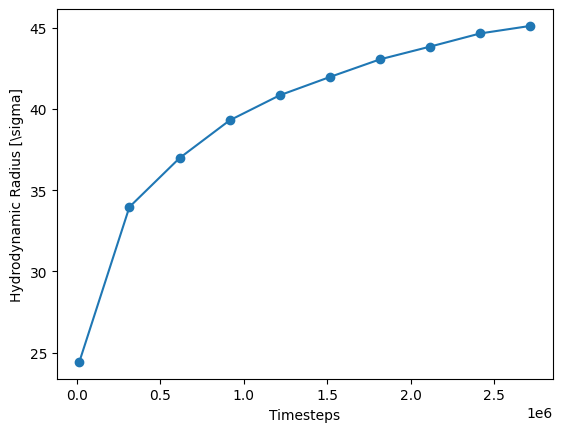

In [200]:
hydro_df = hydro_df.sort_values(by="timestep")

fig, ax = plt.subplots()
ax.plot(hydro_df["timestep"], hydro_df["hydro_radius"], "-o")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Hydrodynamic Radius [\sigma]")

plt.show()

In [201]:
# !pip install statsmodels

In [202]:
# from statsmodels.nonparametric.kernel_regression import KernelReg

# x = hydro_df["timestep"]
# y = hydro_df["hydro_radius"]

# # The third parameter specifies the type of the variable x;
# # 'c' stands for continuous
# kr = KernelReg(y, x, "c")
# y_pred, y_std = kr.fit(x)

In [203]:
# fig, ax = plt.subplots()

# ax.plot(x, y, "-", marker=".", label="Data")
# ax.plot(x, y_pred, label="Smoothed Data")
# ax.set_xlabel("Timesteps")
# ax.set_ylabel("Hydrodynamic Radius [\sigma]")

# plt.legend()
# plt.show()